# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [2]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
df[['lead_time', 'adr']].describe()

,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000


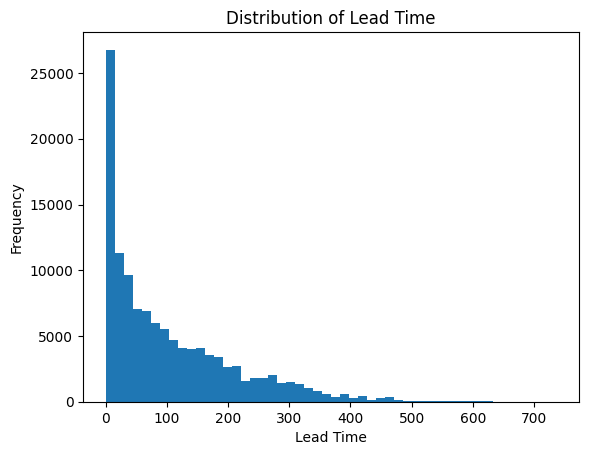

In [4]:
# Distribution of Lead Time
plt.figure()
plt.hist(df['lead_time'], bins=50)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

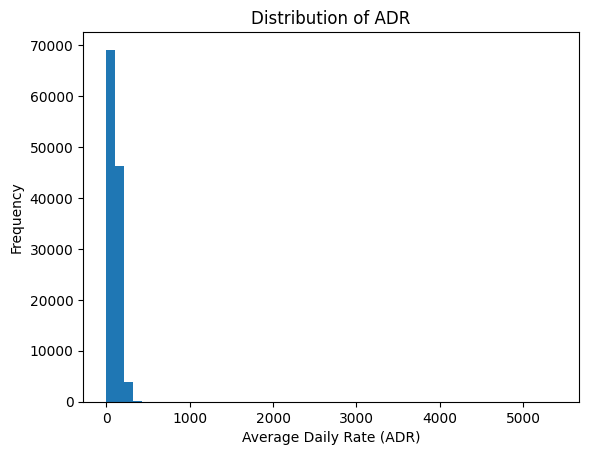

In [5]:
# Distribution of adr
plt.figure()
plt.hist(df['adr'], bins=50)
plt.title('Distribution of ADR')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.show()

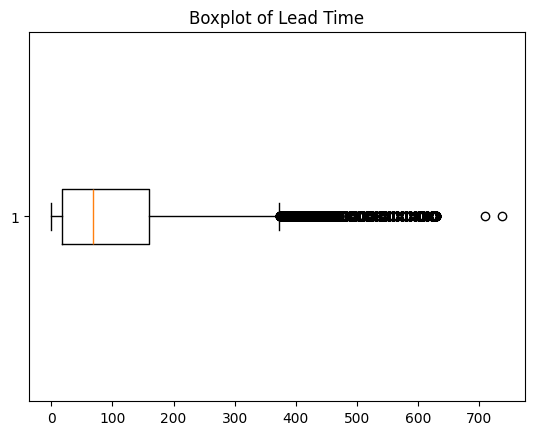

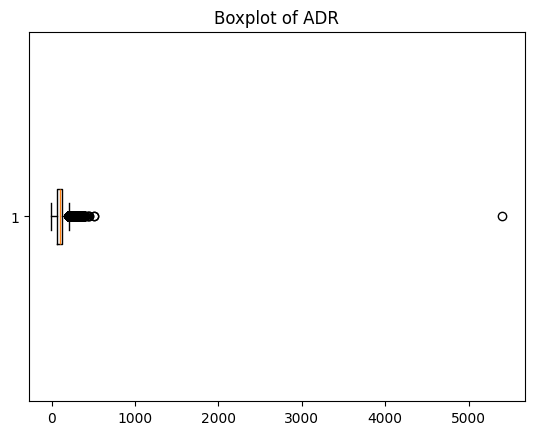

In [6]:
# Boxplots to detect skewness and outliers
plt.figure()
plt.boxplot(df['lead_time'], vert=False)
plt.title('Boxplot of Lead Time')
plt.show()

plt.figure()
plt.boxplot(df['adr'], vert=False)
plt.title('Boxplot of ADR')
plt.show()

**Key findings:**


*   Both *lead_time* and *adr* are **right-skewed**
*   Presence of **extreme outliers**
*   Mean > Median indicates positive skewness



## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [7]:
# Group by cancellation status
df.groupby('is_canceled')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


/tmp/ipython-input-2487974607.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


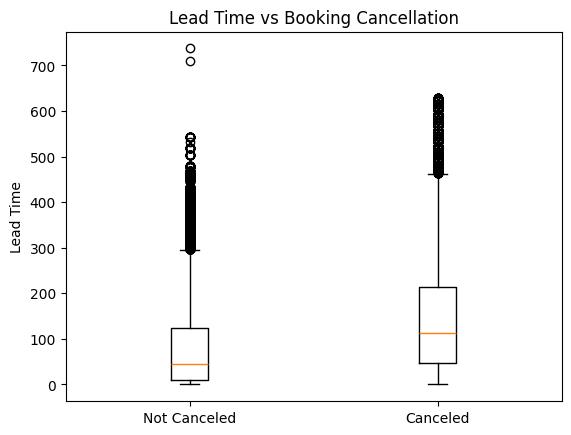

In [11]:
# Boxplot: lead_time vs cancellation
plt.figure()
plt.boxplot(
    [df[df['is_canceled'] == 0]['lead_time'],
     df[df['is_canceled'] == 1]['lead_time']],
    labels=['Not Canceled', 'Canceled']
)
plt.title('Lead Time vs Booking Cancellation')
plt.ylabel('Lead Time')
plt.show()

**Observation:**



*   Canceled bookings have **higher lead times** than non-canceled ones.




## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [12]:
# Ensure month is ordered correctly
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df['arrival_date_month'] = pd.Categorical(
    df['arrival_date_month'],
    categories=month_order,
    ordered=True
)

In [13]:
# Average ADR by month and hotel
monthly_adr = df.groupby(
    ['arrival_date_month', 'hotel']
)['adr'].mean().unstack()
monthly_adr

/tmp/ipython-input-3183061058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_adr = df.groupby(


hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,82.628986,49.461883
February,85.088278,55.171930
March,92.643116,57.520147
April,111.251838,77.849496
May,121.638560,78.758134
June,119.074341,110.444749
July,110.734292,155.181299
August,114.680455,186.790574
September,110.004661,93.252030


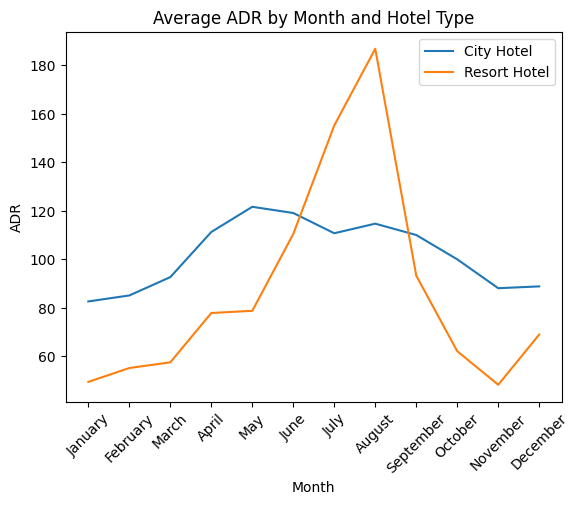

In [14]:
# Plot ADR seasonality
plt.figure()
for hotel in monthly_adr.columns:
    plt.plot(monthly_adr.index, monthly_adr[hotel], label=hotel)

plt.title('Average ADR by Month and Hotel Type')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Insight:**


*   Resort hotels show **strong seasonal ADR spikes**
*   City hotels have **more stable pricing**



## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [15]:
# Cancellation rate by repeated guest
df.groupby('is_repeated_guest')['is_canceled'].mean()

,is_canceled
is_repeated_guest,
0,0.377851
1,0.144882


In [16]:
# Lead time comparison
df.groupby('is_repeated_guest')['lead_time'].mean()

,lead_time
is_repeated_guest,
0,106.425221
1,30.786352


/tmp/ipython-input-3418761354.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


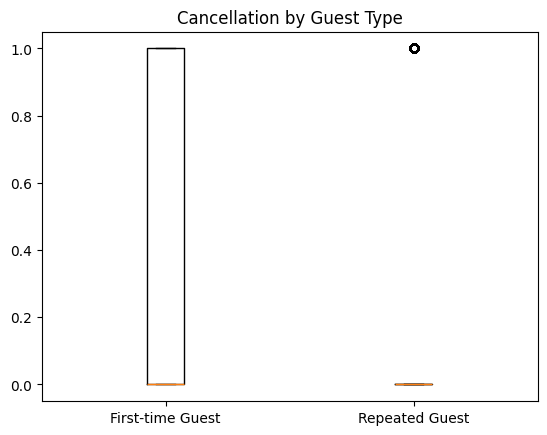

In [17]:
# Boxplot: cancellation by guest type
plt.figure()
plt.boxplot(
    [df[df['is_repeated_guest'] == 0]['is_canceled'],
     df[df['is_repeated_guest'] == 1]['is_canceled']],
    labels=['First-time Guest', 'Repeated Guest']
)
plt.title('Cancellation by Guest Type')
plt.show()

**Conclusion:**


Repeated guests:
*   Cancel less
*   Have shorter lead times



## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [18]:
# Cancellation rate by deposit type
df.groupby('deposit_type')['is_canceled'].mean()

,is_canceled
deposit_type,
No Deposit,0.283770
Non Refund,0.993624
Refundable,0.222222


In [19]:
# Combined effect: lead_time, repeated guest, deposit type
df['lead_time_group'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, 365, df['lead_time'].max()],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

cancellation_pattern = df.groupby(
    ['lead_time_group', 'is_repeated_guest', 'deposit_type']
)['is_canceled'].mean()

cancellation_pattern

/tmp/ipython-input-3600016535.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_pattern = df.groupby(


lead_time_group  is_repeated_guest  deposit_type
Short            0                  No Deposit      0.203053
                                    Non Refund      0.945386
                                    Refundable      0.166667
                 1                  No Deposit      0.074372
                                    Non Refund      0.952381
                                    Refundable      0.000000
Medium           0                  No Deposit      0.322708
                                    Non Refund      0.997922
                                    Refundable      0.500000
                 1                  No Deposit      0.224215
                                    Non Refund           NaN
                                    Refundable           NaN
Long             0                  No Deposit      0.366798
                                    Non Refund      0.994537
                                    Refundable      0.224138
                 1                  No Deposit      0.614583
                                    Non Refund           NaN
                                    Refundable      0.000000
Very Long        0                  No Deposit      0.206250
                                    Non Refund      1.000000
                                    Refundable      0.333333
                 1                  No Deposit           NaN
                                    Non Refund           NaN
                                    Refundable           NaN
Name: is_canceled, dtype: float64

In [20]:
# Highest-risk bookings
df.sort_values('is_canceled', ascending=False).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_group
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,Medium
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,Medium
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23,Short
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11,Medium
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,...,240.0,NaN,0,Transient,153.0,0,0,Canceled,2015-06-02,Medium


**Final Insight:**

Highest cancellation risk:


*   Long lead time
*   First-time guest
*   No deposit

Lowest risk:
*   Short lead time
*   Repeated guest
*   With deposit

